In [1]:
import pandas
import numpy
import dask.dataframe as dask_data_frame

import matplotlib
from matplotlib import pyplot

import seaborn

from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.externals.six import StringIO  

%matplotlib inline
pandas.options.display.max_columns = 50
pandas.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#load data
flight_data_directory = 'data/flight_delay/'
airline_data_frame = pandas.read_csv(flight_data_directory + 'airlines.csv')
airport_data_frame = pandas.read_csv(flight_data_directory + 'airports.csv')
flight_data_frame = dask_data_frame.read_csv(flight_data_directory + 'flights.csv', assume_missing=True)
#flight_data_frame = pandas.read_csv(flight_data_directory + 'flights.csv')

In [3]:
#airlines
airline_data_frame

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [4]:
#airports
airport_data_frame.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65,-75.44
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41,-99.68
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04,-106.61
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.45,-98.42
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.54,-84.19


In [5]:
len(airport_data_frame)

322

In [6]:
#sub sample
len(flight_data_frame.index.compute())

/home/shreyas/miniconda2/envs/python_practice/lib/python2.7/multiprocessing/pool.py:113: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


5819079

In [7]:
sample_flight_data_frame = flight_data_frame.sample(0.25).compute()
len(sample_flight_data_frame.index)

1454770

In [8]:
#flight delays
sample_flight_data_frame.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
326476,2015.00,1.00,22.00,4.00,DL,2501.00,N322NB,MSP,GEG,1135.00,1326.00,111.00,10.00,1336.00,190.00,163.00,150.00,1175.00,1406.00,3.00,1245.00,1409.00,84.00,0.00,0.00,NaN,0.00,0.00,84.00,0.00,0.00
99205,2015.00,1.00,7.00,3.00,MQ,3657.00,N640MQ,DFW,ROW,1015.00,1013.00,-2.00,15.00,1028.00,94.00,90.00,69.00,435.00,1037.00,6.00,1049.00,1043.00,-6.00,0.00,0.00,NaN,nan,nan,nan,nan,nan
147912,2015.00,1.00,10.00,6.00,WN,3339.00,N908WN,LAS,BUR,1235.00,1239.00,4.00,12.00,1251.00,65.00,62.00,47.00,223.00,1338.00,3.00,1340.00,1341.00,1.00,0.00,0.00,NaN,nan,nan,nan,nan,nan
10783,2015.00,1.00,1.00,4.00,EV,4173.00,N14153,SLC,DEN,1755.00,nan,nan,nan,nan,89.00,nan,nan,391.00,nan,nan,1924.00,nan,nan,0.00,1.00,C,nan,nan,nan,nan,nan
556417,2015.00,2.00,6.00,5.00,US,772.00,N286AY,SJU,PHL,1545.00,1738.00,113.00,11.00,1749.00,240.00,221.00,206.00,1576.00,2015.00,4.00,1845.00,2019.00,94.00,0.00,0.00,NaN,0.00,0.00,0.00,94.00,0.00


In [9]:
sample_flight_data_frame.dtypes

YEAR                   float64
MONTH                  float64
DAY                    float64
DAY_OF_WEEK            float64
AIRLINE                 object
FLIGHT_NUMBER          float64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE    float64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               float64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      float64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               float64
CANCELLED              float64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [10]:
# numeric_columns = flight_data_frame.select_dtypes(include=[numpy.number]).columns.values.tolist()

In [11]:
# for numeric_column in numeric_columns:
#     print(numeric_column + ' ' \
#           + str(flight_data_frame[numeric_column].apply(lambda x: numpy.isnan(x)).sum().compute()))

In [12]:
#remove unwanted columns
sample_flight_data_frame = sample_flight_data_frame.drop(labels=[
    'FLIGHT_NUMBER',
    'TAIL_NUMBER',
    'DEPARTURE_TIME',    
    'TAXI_OUT',
    'WHEELS_OFF',
    'ELAPSED_TIME',
    'WHEELS_ON',
    'TAXI_IN',
    'ARRIVAL_TIME',
    'CANCELLATION_REASON'], axis=1)
sample_flight_data_frame.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
326476,2015.00,1.00,22.00,4.00,DL,MSP,GEG,1135.00,111.00,190.00,150.00,1175.00,1245.00,84.00,0.00,0.00,0.00,0.00,84.00,0.00,0.00
99205,2015.00,1.00,7.00,3.00,MQ,DFW,ROW,1015.00,-2.00,94.00,69.00,435.00,1049.00,-6.00,0.00,0.00,nan,nan,nan,nan,nan
147912,2015.00,1.00,10.00,6.00,WN,LAS,BUR,1235.00,4.00,65.00,47.00,223.00,1340.00,1.00,0.00,0.00,nan,nan,nan,nan,nan
10783,2015.00,1.00,1.00,4.00,EV,SLC,DEN,1755.00,nan,89.00,nan,391.00,1924.00,nan,0.00,1.00,nan,nan,nan,nan,nan
556417,2015.00,2.00,6.00,5.00,US,SJU,PHL,1545.00,113.00,240.00,206.00,1576.00,1845.00,94.00,0.00,0.00,0.00,0.00,0.00,94.00,0.00


In [13]:
#check empty values
def check_nan():
    return numpy.divide(sample_flight_data_frame.count() * 100.0 , len(sample_flight_data_frame.index))

check_nan()

YEAR                  100.00
MONTH                 100.00
DAY                   100.00
DAY_OF_WEEK           100.00
AIRLINE               100.00
ORIGIN_AIRPORT        100.00
DESTINATION_AIRPORT   100.00
SCHEDULED_DEPARTURE   100.00
DEPARTURE_DELAY        98.52
SCHEDULED_TIME        100.00
AIR_TIME               98.19
DISTANCE              100.00
SCHEDULED_ARRIVAL     100.00
ARRIVAL_DELAY          98.19
DIVERTED              100.00
CANCELLED             100.00
AIR_SYSTEM_DELAY       18.27
SECURITY_DELAY         18.27
AIRLINE_DELAY          18.27
LATE_AIRCRAFT_DELAY    18.27
WEATHER_DELAY          18.27
dtype: float64

In [14]:
#fill empty values
sample_flight_data_frame['DEPARTURE_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['ARRIVAL_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['AIR_SYSTEM_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['SECURITY_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['AIRLINE_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['LATE_AIRCRAFT_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['WEATHER_DELAY'].fillna(0.0, inplace=True)
check_nan()

YEAR                  100.00
MONTH                 100.00
DAY                   100.00
DAY_OF_WEEK           100.00
AIRLINE               100.00
ORIGIN_AIRPORT        100.00
DESTINATION_AIRPORT   100.00
SCHEDULED_DEPARTURE   100.00
DEPARTURE_DELAY       100.00
SCHEDULED_TIME        100.00
AIR_TIME               98.19
DISTANCE              100.00
SCHEDULED_ARRIVAL     100.00
ARRIVAL_DELAY         100.00
DIVERTED              100.00
CANCELLED             100.00
AIR_SYSTEM_DELAY      100.00
SECURITY_DELAY        100.00
AIRLINE_DELAY         100.00
LATE_AIRCRAFT_DELAY   100.00
WEATHER_DELAY         100.00
dtype: float64

In [15]:
#remove rows if any nan present
sample_flight_data_frame.dropna(axis=0, inplace=True)
len(sample_flight_data_frame.index)

1428495

In [16]:
#exploratory analysis
interesting_columns = [
    'DEPARTURE_DELAY',
    'AIR_TIME',
    'DISTANCE',
    'ARRIVAL_DELAY',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'WEATHER_DELAY'
]

sample_flight_data_frame[interesting_columns].describe()

,DEPARTURE_DELAY,AIR_TIME,DISTANCE,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1428495.00,1428495.00,1428495.00,1428495.00,1428495.00,1428495.00,1428495.00,1428495.00,1428495.00
mean,9.28,113.55,824.72,4.39,2.50,0.02,3.51,4.38,0.54
std,36.69,72.32,609.34,39.07,13.14,1.02,21.70,20.83,8.76
min,-68.00,7.00,31.00,-87.00,0.00,0.00,0.00,0.00,0.00
25%,-5.00,60.00,373.00,-13.00,0.00,0.00,0.00,0.00,0.00
50%,-2.00,94.00,650.00,-5.00,0.00,0.00,0.00,0.00,0.00
75%,7.00,144.00,1065.00,8.00,0.00,0.00,0.00,0.00,0.00
max,1631.00,683.00,4983.00,1638.00,991.00,440.00,1631.00,1190.00,1039.00


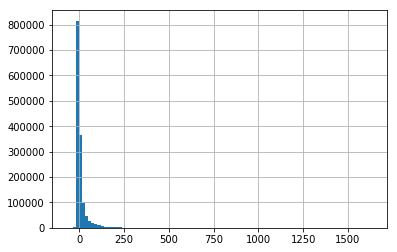

In [17]:
sample_flight_data_frame['DEPARTURE_DELAY'].hist(bins=100)

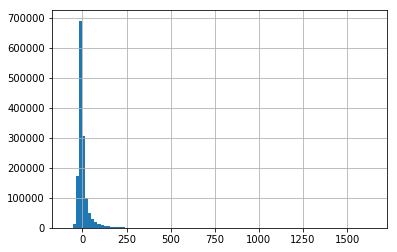

In [18]:
sample_flight_data_frame['ARRIVAL_DELAY'].hist(bins=100)

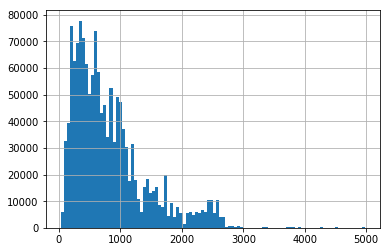

In [19]:
sample_flight_data_frame['DISTANCE'].hist(bins=100)

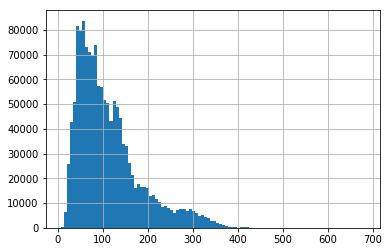

In [20]:
sample_flight_data_frame['AIR_TIME'].hist(bins=100)

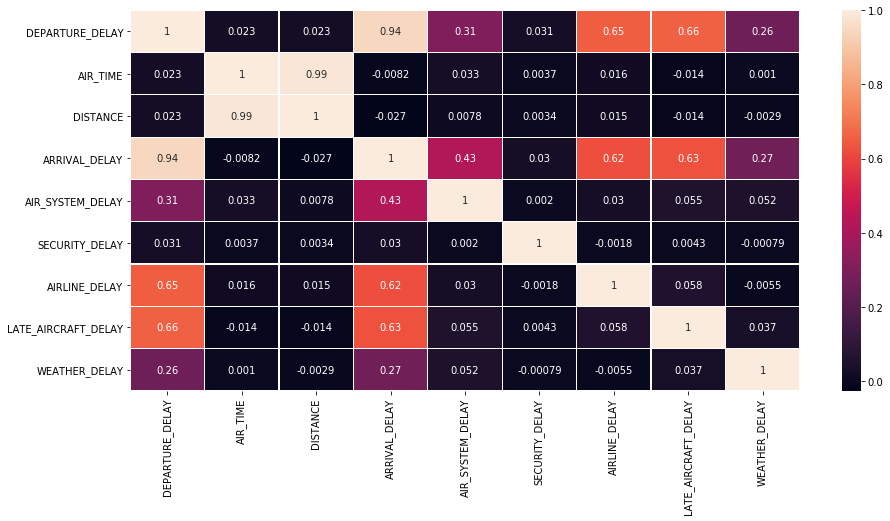

In [21]:
#corelation plot
pyplot.figure(figsize=(15,7))
seaborn.heatmap(sample_flight_data_frame[interesting_columns].corr(), annot=True, linewidths=0.1)

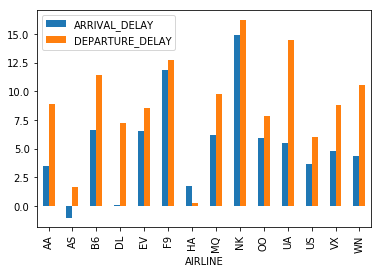

In [22]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['AIRLINE'],\
                       aggfunc=numpy.mean).plot(kind='bar')

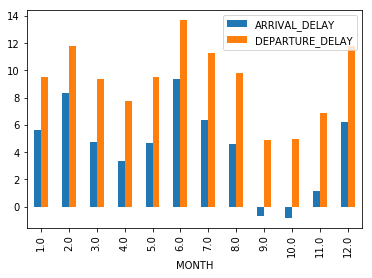

In [23]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['MONTH'],\
                       aggfunc=numpy.mean).plot(kind='bar')

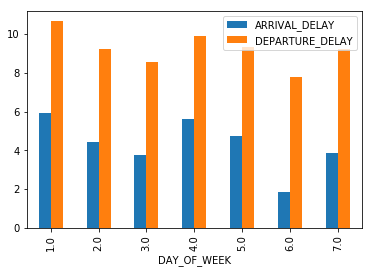

In [24]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['DAY_OF_WEEK'],\
                       aggfunc=numpy.mean).plot(kind='bar')

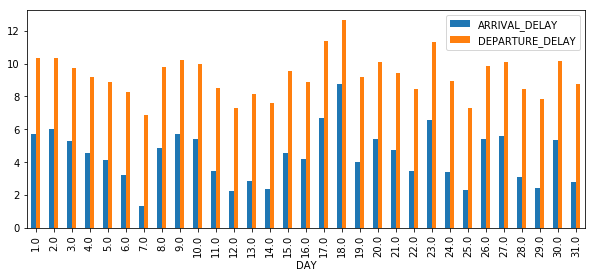

In [25]:
axes = pyplot.figure(figsize=(10,4)).gca()
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['DAY'],\
                       aggfunc=numpy.mean).plot(kind='bar', ax=axes)

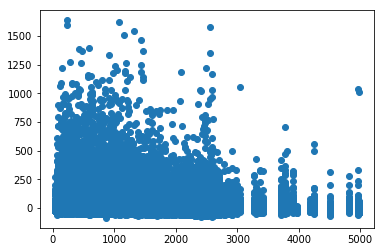

In [26]:
pyplot.scatter(sample_flight_data_frame['DISTANCE'], sample_flight_data_frame['ARRIVAL_DELAY'])

In [27]:
sample_flight_data_frame.pivot_table(values=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], index=['ORIGIN_AIRPORT'],\
                       aggfunc=numpy.mean)[:10].sort_values(by='ARRIVAL_DELAY', ascending=False)

,ARRIVAL_DELAY,DEPARTURE_DELAY
ORIGIN_AIRPORT,,
10157,18.22,20.94
10146,11.53,8.00
10135,10.19,13.47
10154,5.38,6.00
10140,1.84,6.82
10165,-1.00,-10.00
10141,-1.46,-1.69
10158,-6.81,-1.93
10136,-11.38,-1.44


In [28]:
sample_flight_data_frame.pivot_table(values=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], index=['DESTINATION_AIRPORT'],\
                       aggfunc=numpy.mean)[:10].sort_values(by='ARRIVAL_DELAY', ascending=False)

,ARRIVAL_DELAY,DEPARTURE_DELAY
DESTINATION_AIRPORT,,
10146,15.64,12.43
10154,14.70,11.20
10157,8.10,6.95
10135,5.48,6.52
10155,2.44,0.84
10140,0.48,4.08
10158,-2.90,-1.49
10165,-4.00,-9.00
10136,-4.53,-2.75


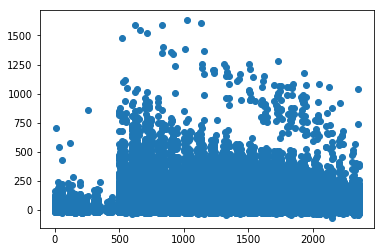

In [29]:
pyplot.scatter(sample_flight_data_frame['SCHEDULED_DEPARTURE'], sample_flight_data_frame['DEPARTURE_DELAY'])

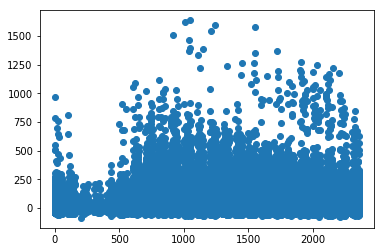

In [30]:
pyplot.scatter(sample_flight_data_frame['SCHEDULED_ARRIVAL'], sample_flight_data_frame['ARRIVAL_DELAY'])

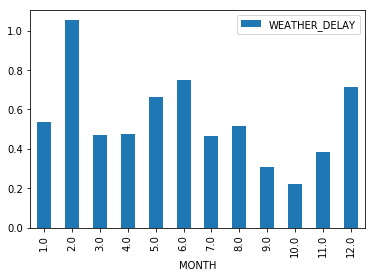

In [31]:
sample_flight_data_frame.pivot_table(values=['WEATHER_DELAY'], index=['MONTH'],\
                       aggfunc=numpy.mean).plot(kind='bar')

In [32]:
#prepare data
prepared_flight_data_frame = sample_flight_data_frame.copy(deep=True)

# bins = [0.0, 600.0, 1200.0, 1800.0, 2100.0, 2400.0]
# labels = ['early_morning', 'morning', 'afternoon', 'evening', 'night']

bins = range(0, 2500, 100)
prepared_flight_data_frame['SCHEDULED_DEPARTURE_CATEGORY'] = pandas.cut(\
        prepared_flight_data_frame['SCHEDULED_DEPARTURE'],\
        bins=bins)
prepared_flight_data_frame[['SCHEDULED_DEPARTURE', 'SCHEDULED_DEPARTURE_CATEGORY']].head()

,SCHEDULED_DEPARTURE,SCHEDULED_DEPARTURE_CATEGORY
326476,1135.00,"(1100, 1200]"
99205,1015.00,"(1000, 1100]"
147912,1235.00,"(1200, 1300]"
556417,1545.00,"(1500, 1600]"
483072,2150.00,"(2100, 2200]"


In [33]:
prepared_flight_data_frame['SCHEDULED_ARRIVAL_CATEGORY'] = pandas.cut(\
        prepared_flight_data_frame['SCHEDULED_ARRIVAL'],\
        bins=bins)
prepared_flight_data_frame[['SCHEDULED_ARRIVAL', 'SCHEDULED_ARRIVAL_CATEGORY']].head()

,SCHEDULED_ARRIVAL,SCHEDULED_ARRIVAL_CATEGORY
326476,1245.00,"(1200, 1300]"
99205,1049.00,"(1000, 1100]"
147912,1340.00,"(1300, 1400]"
556417,1845.00,"(1800, 1900]"
483072,2226.00,"(2200, 2300]"


In [34]:
prepared_flight_data_frame['DISTANCE_CATEGORY'] = pandas.cut(\
        prepared_flight_data_frame['DISTANCE'],\
        bins=[0, 1000, 2000, 3000], labels=['short', 'medium', 'long'])
prepared_flight_data_frame[['DISTANCE', 'DISTANCE_CATEGORY']].head()

,DISTANCE,DISTANCE_CATEGORY
326476,1175.00,medium
99205,435.00,short
147912,223.00,short
556417,1576.00,medium
483072,100.00,short


In [35]:
prepared_flight_data_frame.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'SCHEDULED_DEPARTURE_CATEGORY',
       'SCHEDULED_ARRIVAL_CATEGORY', 'DISTANCE_CATEGORY'], dtype=object)

In [36]:
#define problem
define_delay = 30.0;

def is_delay(value):
    if value > define_delay:
        return 1
    
    return 0

prepared_flight_data_frame['IS_DELAY'] = prepared_flight_data_frame['ARRIVAL_DELAY'].apply(is_delay)
class_probability = prepared_flight_data_frame['IS_DELAY'].mean()
print('class_probability ' + str(class_probability))

class_probability 0.110722123634


In [39]:
#seperate train and test data
train_data_frame = prepared_flight_data_frame.sample(frac=0.9)
test_data_frame = prepared_flight_data_frame.drop(train_data_frame.index)

len(train_data_frame)

1285646

In [40]:
len(test_data_frame)

18204

In [64]:
#model

#naive bayes multi-feature binary classification
#https://en.wikipedia.org/wiki/Naive_Bayes_classifier
class_probability = train_data_frame['IS_DELAY'].mean()

def get_class_probability():
    return class_probability

# def get_features_probability(features, row):
#     data_frame = train_data_frame
#     for feature in features:
#         data_frame = data_frame.loc[(data_frame[feature] == row[feature])]
    
#     print(len(data_frame))    
#     return (len(data_frame) * 1.0 / len(train_data_frame))

def get_features_probability(features, row):
    product = 1.0
    for feature in features:
        data_frame = train_data_frame.loc[(train_data_frame[feature] == row[feature])]
#         print(len(data_frame))
        product = product * (len(data_frame) * 1.0 / len(train_data_frame))
    
    return product

# def get_feature_class_probability(feature, row):
#     return train_data_frame.loc[(train_data_frame[feature] == row[feature])]['IS_DELAY'].mean()

def get_feature_class_probability(features, row):
    data_frame = train_data_frame
    for feature in features:
        data_frame = data_frame.loc[(data_frame[feature] == row[feature])]
    
    return data_frame['IS_DELAY'].mean()


def get_sample_probability(features, sample):
#     product_feature_class_probability = 1.0
# #     not_product_feature_class_probability = 1.0
    
#     for feature in features:
#         feature_class_probability = get_feature_class_probability(feature, sample)
#         product_feature_class_probability = product_feature_class_probability \
#                 * feature_class_probability
            
# #         not_product_feature_class_probability = not_product_feature_class_probability \
# #                 * (1 - feature_class_probability)
    
#     features_probability = get_features_probability(features, sample)

    
# #     print('product_feature_class_probability ' + str(product_feature_class_probability))
# #     print('features_probability ' + str(features_probability))
#     if features_probability > 0.0:
#         return (get_class_probability() *  product_feature_class_probability)\
#                 /  features_probability
        
#     return 0.0
    
# #     class_predictions = [(1 - get_class_probability() *  not_product_feature_class_probability),\
# #                          (get_class_probability() *  product_feature_class_probability)]
# #     class_predictions = [(not_product_feature_class_probability),\
# #                          (product_feature_class_probability)]
# #     print(class_predictions)
# #     return numpy.argmax(class_predictions)
        
#     return product_feature_class_probability * 100000
    return get_feature_class_probability(features, sample)
        
def get_prediction(features, test_data_frame):
    probability_prediction = test_data_frame.apply(\
            lambda row: get_sample_probability(features, row), axis=1)
    print('probability_prediction')
    print(probability_prediction)
    return probability_prediction.apply(\
#             lambda value: 1 if value > (0.5) else 0).values
            lambda value: numpy.random.binomial(1, value)).values
#     return probability_prediction.values

In [72]:
#unit testing
test_features = ['MONTH', 'AIRLINE','SCHEDULED_DEPARTURE_CATEGORY',\
           'SCHEDULED_ARRIVAL_CATEGORY']

test_sample = test_data_frame.sample(n=10)
print(get_prediction(test_features,test_sample))
test_sample['IS_DELAY'].values

probability_prediction
290967   0.03
589094   0.20
469030   0.08
296676   0.08
632398   0.27
416967   0.13
159825   0.17
580007   0.12
282465   0.02
408988   0.12
dtype: float64
[0 1 0 0 0 1 0 0 0 1]


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [59]:
#lets predict
features = ['MONTH', 'AIRLINE', 'ORIGIN_AIRPORT', \
                 'DESTINATION_AIRPORT','SCHEDULED_DEPARTURE_CATEGORY',\
           'SCHEDULED_ARRIVAL_CATEGORY', 'DISTANCE_CATEGORY']

# features = ['MONTH', 'AIRLINE', 'SCHEDULED_DEPARTURE_CATEGORY',\
#            'SCHEDULED_ARRIVAL_CATEGORY']

def test_model(test_sample):
    prediction = get_prediction(features, test_sample)
    output = test_sample['IS_DELAY'].values
    return metrics.accuracy_score(prediction, output)

sample_accuracies = []
for i in range(100):
    test_sample = test_data_frame.sample(n=10)
    sample_accuracy = test_model(test_sample)
    sample_accuracies.append(sample_accuracy)
    print(str(i) + ':sample accuracy ' + str(sample_accuracy))                

0:sample accuracy 0.9
1:sample accuracy 0.9
2:sample accuracy 0.8
3:sample accuracy 0.9
4:sample accuracy 1.0
5:sample accuracy 0.8
6:sample accuracy 0.9
7:sample accuracy 1.0
8:sample accuracy 0.9
9:sample accuracy 0.8
10:sample accuracy 0.9
11:sample accuracy 0.9
12:sample accuracy 0.8
13:sample accuracy 0.9
14:sample accuracy 0.9
15:sample accuracy 0.9
16:sample accuracy 0.8
17:sample accuracy 0.9
18:sample accuracy 0.6
19:sample accuracy 1.0
20:sample accuracy 1.0
21:sample accuracy 0.9
22:sample accuracy 1.0
23:sample accuracy 0.7
24:sample accuracy 0.7
25:sample accuracy 0.8
26:sample accuracy 0.9
27:sample accuracy 0.9
28:sample accuracy 0.8
29:sample accuracy 0.8
30:sample accuracy 1.0
31:sample accuracy 0.8
32:sample accuracy 0.9
33:sample accuracy 0.9
34:sample accuracy 1.0
35:sample accuracy 1.0
36:sample accuracy 0.9
37:sample accuracy 1.0
38:sample accuracy 1.0
39:sample accuracy 0.9
40:sample accuracy 1.0
41:sample accuracy 0.9
42:sample accuracy 1.0
43:sample accuracy 0.

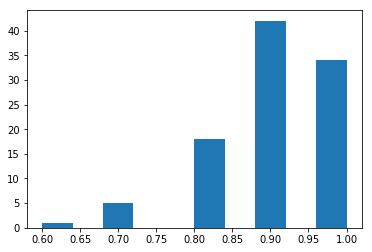

In [60]:
array_output = pyplot.hist(sample_accuracies, bins=10)

In [61]:
print('mean accuracy ' + str(numpy.mean(sample_accuracies)))

mean accuracy 0.903


In [62]:
#verification
def dummy_model(test_sample):
    prediction = numpy.random.binomial(1, class_probability, len(test_sample))
    output = test_sample['IS_DELAY'].values
    return metrics.accuracy_score(prediction, output)

sample_accuracies = []        
for i in range(1000):
    test_sample = test_data_frame.sample(n=10)
    sample_accuracy = dummy_model(test_sample)
    sample_accuracies.append(sample_accuracy)
    
print('dummy model accuracy ' + str(numpy.mean(sample_accuracies)))

dummy model accuracy 0.8101
